# **Hotel Recommendation**



##### **Project Type**    - Machine Learning
##### **Contribution**    -


Github link :

Project Documentation : [Documentation link]

Presentation : [Video link]

In [ ]:
#!pip freeze > requirements.txt

absl-py==1.4.0
accelerate==0.32.1
aiohappyeyeballs==2.3.4
aiohttp==3.10.1
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.13
albumentations==1.4.12
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.18.0
asn1crypto==1.5.1
astropy==6.1.2
astropy-iers-data==0.2024.8.5.0.32.23
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.12.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.4.0
catalogue==2.0.10
certifi==2024.7.4
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
clarabel==0.9.0
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.18.1
cloudpickle==2.2.1
cmake==3.30.2
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confec

# **Problem Statement and Objective**


**Problem Overview**



**Objective:**


# ***Let's Begin !***

## ***1. Know Your Data***

Before we diving into the project, our initial step is to familiarize ourselves with the dataset. Let's load the data and take a look.

### Import Libraries

In [37]:
#!pip install surprise
#!pip install streamlit
#!pip install gender_guesser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 2.7 MB/s eta 0:00:00


In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gender_guesser.detector import Detector
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy
import streamlit as st
import joblib
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#Mount drive
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# #Load the dataset
# df_hotels=pd.read_csv('/content/drive/MyDrive/Almabetter/Masters/Specilization/Module1/Capstone/hotels.csv',na_values=['None', 'NA', 'NaN', 'none',''])
# df_users=pd.read_csv('/content/drive/MyDrive/Almabetter/Masters/Specilization/Module1/Capstone/users.csv',na_values=['None', 'NA', 'NaN','none', ''])

In [6]:
df_hotels = pd.read_csv('../data/hotels.csv')
df_users = pd.read_csv('../data/users.csv')

In [7]:
# Change column names to lowercase with underscores instead of spaces
df_hotels.columns = df_hotels.columns.str.lower().str.replace(' ', '_')
df_users.columns = df_users.columns.str.lower().str.replace(' ', '_')

In [8]:
# Merge dataframes
df = pd.merge(df_hotels, df_users, left_on='usercode', right_on='code', how='inner')


### Peek into data 👀

In [9]:
#First 5 rows
df.head(2)

,travelcode,usercode,name_x,place,days,price,total,date,code,company,name_y,gender,age
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019,0,4You,Roy Braun,male,21
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019,0,4You,Roy Braun,male,21


In [10]:
#Last 5 rows
df.tail(2)

,travelcode,usercode,name_x,place,days,price,total,date,code,company,name_y,gender,age
40550,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020,1339,Umbrella LTDA,Paul Rodriguez,male,35
40551,135942,1339,Hotel BD,Natal (RN),4,242.88,971.52,07/16/2020,1339,Umbrella LTDA,Paul Rodriguez,male,35


In [11]:
# Dataset Rows & Columns
print(f'Shape of original dataframe:  {df.shape}')

Shape of original dataframe:  (40552, 13)


## ***2. Understanding Data & Preprocessing***

Moving forward to the next stage, our focus is on gaining a deeper understanding of the data and undertaking the initial preprocessing steps. These initial preprocessing efforts are crucial for enhancing the usability of the data in subsequent analyses.

### **Understanding Data**

In [12]:
#Variables in the dataset
print(f'Variables in the dataset : {list(df.columns)}')

Variables in the dataset : ['travelcode', 'usercode', 'name_x', 'place', 'days', 'price', 'total', 'date', 'code', 'company', 'name_y', 'gender', 'age']


**Variables Description**

In [13]:
def summary(df):
    summry = pd.DataFrame(df.dtypes, columns=['data type'])
    summry['#missing'] = df.isnull().sum().values
    summry['#duplicate'] = df.duplicated().sum()
    summry['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summry['min'] = desc['min'].values
    summry['max'] = desc['max'].values
    summry['avg'] = desc['mean'].values
    summry['std dev'] = desc['std'].values
    summry['top value'] = desc['top'].values
    summry['freq'] = desc['freq'].values

    return summry

In [14]:
summary(df).style.set_caption(" Summary of the Data ").\
background_gradient(cmap='Blues', axis=0). \
set_properties(**{'border': '1.3px dotted', 'color': '', 'caption-side': 'left'})

,data type,#missing,#duplicate,#unique,min,max,avg,std dev,top value,freq
travelcode,int64,0,0,40552,0.000000,135942.000000,67911.794461,39408.199333,nan,nan
usercode,int64,0,0,1310,0.000000,1339.000000,666.963726,391.136794,nan,nan
name_x,object,0,0,9,nan,nan,nan,nan,Hotel K,5094
place,object,0,0,9,nan,nan,nan,nan,Salvador (BH),5094
days,int64,0,0,4,1.000000,4.000000,2.499679,1.119326,nan,nan
price,float64,0,0,9,60.390000,313.020000,214.439554,76.742305,nan,nan
total,float64,0,0,36,60.390000,1252.080000,536.229513,319.331482,nan,nan
date,object,0,0,199,nan,nan,nan,nan,10/31/2019,404
code,int64,0,0,1310,0.000000,1339.000000,666.963726,391.136794,nan,nan
company,object,0,0,5,nan,nan,nan,nan,4You,14014


In [15]:
def print_unique_counts(df, columns):
    for col in columns:
        unique_count = df[col].nunique()
        value_counts = df[col].value_counts()
        print(f"There are {unique_count} unique values and counts of each in {value_counts}\n")

# Columns to check uniques and values
columns_to_print = ['name_x', 'place', 'days','company', 'gender']
print_unique_counts(df, columns_to_print)

There are 9 unique values and counts of each in name_x
Hotel K     5094
Hotel CB    5029
Hotel BD    4829
Hotel AF    4828
Hotel AU    4467
Hotel BP    4437
Hotel BW    4333
Hotel Z     4205
Hotel A     3330
Name: count, dtype: int64

There are 9 unique values and counts of each in place
Salvador (BH)          5094
Rio de Janeiro (RJ)    5029
Natal (RN)             4829
Sao Paulo (SP)         4828
Recife (PE)            4467
Brasilia (DF)          4437
Campo Grande (MS)      4333
Aracaju (SE)           4205
Florianopolis (SC)     3330
Name: count, dtype: int64

There are 4 unique values and counts of each in days
1    10171
4    10163
2    10110
3    10108
Name: count, dtype: int64

There are 5 unique values and counts of each in company
4You             14014
Acme Factory      7665
Wonka Company     6706
Umbrella LTDA     6229
Monsters CYA      5938
Name: count, dtype: int64

There are 3 unique values and counts of each in gender
female    13690
male      13585
none      13277
Name: c

### ***Data Preprocessing***
This step before EDA helps us to understand data easily further
1. Date type conversion.
2. Fill missing values of gender with gender_guesser
3. Drop duplicates


In [16]:
# Converting datetime columns to same format
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True)

In [17]:
# Assuming df and detector are already defined

# Extract first and last names
df['name_y'] = df['name_y'].apply(lambda x: x.split()[0])
detector = Detector()

df['gender'] = np.where(df['gender'].isnull(), df['name_y'].apply(lambda x: detector.get_gender(x.split()[0])), df['gender'])
# Mapping dictionary
gender_mapping = {
    'andy': 'NA',
    'unknown': 'NA',
    'mostly_male': 'male',
    'mostly_female': 'female',
    'male': 'male',
    'female': 'female'
}

# Replace the predicted gender values using the mapping dictionary
df['gender'] = df['gender'].map(gender_mapping)


In [18]:
# This function helps us to check and drop duplicates whenever required
def check_drop_duplications(df):
  if len(df[df.duplicated()]) > 0:
    print(f'Count of duplicate rows : {len(df[df.duplicated()])}')
    print(f'Dropping duplicates')
    df = df.drop_duplicates()
  else:
    print(f'There are no duplicates.')
  return df

In [19]:
# Lets see if we have any duplicate rows
df = check_drop_duplications(df)

There are no duplicates.


## ***3. Exploratory Data Analysis***

#### Chart-1 Distribution of Prices and Total Cost

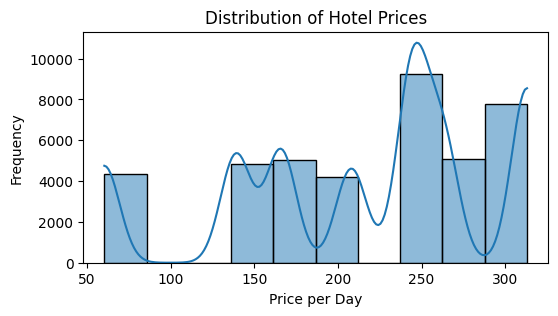

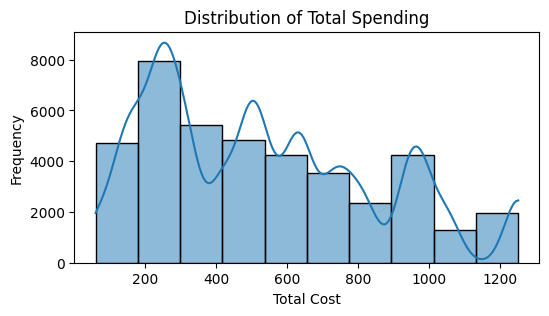

In [51]:
# Distribution of Prices and Total Cost
plt.figure(figsize=(6, 3))
sns.histplot(df_hotels['price'], kde=True, bins=10)
plt.title('Distribution of Hotel Prices')
plt.xlabel('Price per Day')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(df_hotels['total'], kde=True, bins=10)
plt.title('Distribution of Total Spending')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()

#### Chart - 2 Most Popular Hotels



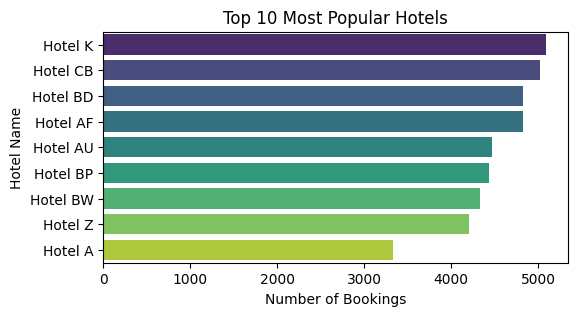

In [27]:
# Most Popular Hotels
popular_hotels = df_hotels['name'].value_counts().head(10)

plt.figure(figsize=(6, 3))
sns.barplot(x=popular_hotels.values, y=popular_hotels.index, palette='viridis')
plt.title('Top 10 Most Popular Hotels')
plt.xlabel('Number of Bookings')
plt.ylabel('Hotel Name')
plt.show()

#### Chart 3 - Booking Trends Over Time

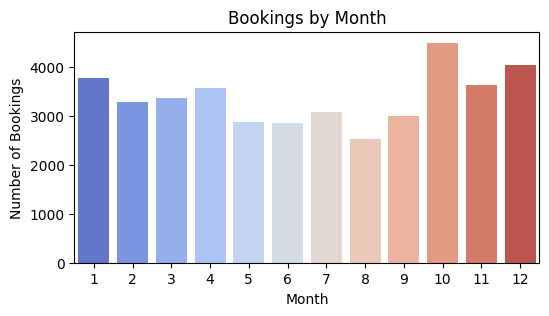

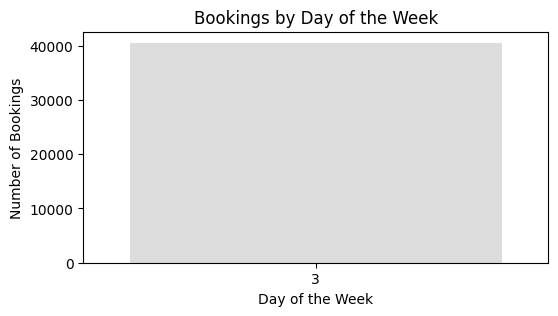

In [29]:
df_hotels['date'] = pd.to_datetime(df_hotels['date'])
df_hotels['month'] = df_hotels['date'].dt.month
df_hotels['day_of_week'] = df_hotels['date'].dt.dayofweek

plt.figure(figsize=(6, 3))
sns.countplot(x='month', data=df_hotels, palette='coolwarm')
plt.title('Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='day_of_week', data=df_hotels, palette='coolwarm')
plt.title('Bookings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.show()

#### Chart 4 - User Demographics

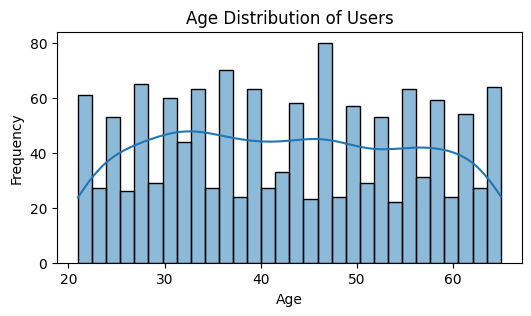

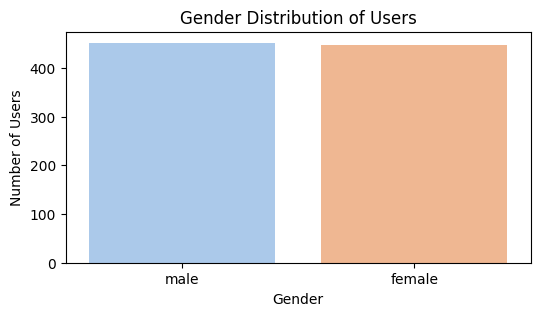

In [52]:
# User Demographics
plt.figure(figsize=(6, 3))
sns.histplot(df_users['age'], kde=True, bins=30)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

gender_counts = df_users['gender'].value_counts()
plt.figure(figsize=(6, 3))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

### Overall Insights

## ***4. Feature Engineering***

### 1. Feature Engineering

In [20]:
# Create Additional Features
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['cost_per_day'] = df['total'] / df['days']
df['price_range'] = pd.cut(df['price'], bins=[0, 100, 300, 500, 1000], labels=['Low', 'Medium', 'High', 'Premium'])
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '56+'])


### 2. Drop Unnecesary columns

In [11]:
df.columns

Index(['travelcode', 'usercode', 'name_x', 'place', 'days', 'price', 'total',
       'date', 'code', 'company', 'name_y', 'gender', 'age', 'month',
       'day_of_week', 'cost_per_day', 'price_range', 'age_group'],
      dtype='object')

In [21]:
# Drop unnecessary columns and columns with very high percentage of nulls
# Drop columns which are not useful because of high number of missing values or high number of categories
drop_cols = ['name_y','travelcode']
df = df.drop(columns=drop_cols)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   usercode      40552 non-null  int64         
 1   name_x        40552 non-null  object        
 2   place         40552 non-null  object        
 3   days          40552 non-null  int64         
 4   price         40552 non-null  float64       
 5   total         40552 non-null  float64       
 6   date          40552 non-null  datetime64[ns]
 7   code          40552 non-null  int64         
 8   company       40552 non-null  object        
 9   gender        27275 non-null  object        
 10  age           40552 non-null  int64         
 11  month         40552 non-null  int32         
 12  day_of_week   40552 non-null  int32         
 13  cost_per_day  40552 non-null  float64       
 14  price_range   40552 non-null  category      
 15  age_group     40552 non-null  catego

In [22]:
# check duplicates after removing date
df = check_drop_duplications(df)

There are no duplicates.


## ***5. Transformation on Train Data***

### 1. Encoding

In [23]:
#Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le_name = LabelEncoder()
df['name_encoded'] = le_name.fit_transform(df['name_x'])

le_place = LabelEncoder()
df['place_encoded'] = le_place.fit_transform(df['place'])

le_company = LabelEncoder()
df['company_encoded'] = le_company.fit_transform(df['company'])

le_gender = LabelEncoder()
df['gender_encoded'] = le_gender.fit_transform(df['gender'])


In [24]:
# Categorical features to be encoded
categorical_features = ['place', 'age_group', 'gender', 'company']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse=False)

# Apply one-hot encoding to the categorical features
encoded_categorical = encoder.fit_transform(df[categorical_features])

# Combine the encoded categorical features with the numeric features
numeric_features = df[['days', 'price', 'month', 'day_of_week', 'cost_per_day', 'age']]
content_features = np.hstack((numeric_features, encoded_categorical))


In [25]:
user_item_matrix = df.pivot_table(index='usercode', columns='name_encoded', values='total', fill_value=0)


In [26]:
# Normalize all features
scaler = MinMaxScaler()
encoded_features_scaled  = scaler.fit_transform(content_features)


## ***6.Modelling & Evaluation***

In [28]:
# Prepare data for collaborative filtering
reader = Reader(rating_scale=(df['total'].min(), df['total'].max()))
data = Dataset.load_from_df(df[['usercode', 'name_x', 'total']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.25)

# Train the SVD model
svd_model = SVD()
svd_model.fit(trainset)

#path = '/content/drive/MyDrive/Almabetter/Masters/Specilization/Module1/Capstone/'
# Save the trained model
joblib.dump(svd_model,'collaborative_recommendation.pkl')


['collaborative_recommendation.pkl']

In [28]:
def get_content_based_recommendations(user_code, df, encoded_features_scaled, top_n=5):
    # Check if the user exists in the data
    if user_code not in df['usercode'].unique():
        print("Caution: New user detected. Using top visited hotels for recommendations.")
        top_hotels = df['name_x'].value_counts().head(top_n).index.tolist()
        return top_hotels

    # Get the index of the user
    user_idx = df[df['usercode'] == user_code].index[0]

    # Get the user's feature vector
    user_features = encoded_features_scaled[user_idx].reshape(1, -1)

    # Compute the similarity between the user and all hotels
    similarities = cosine_similarity(user_features, encoded_features_scaled)

    # Get the indices of the most similar hotels
    similar_indices = similarities.argsort()[0][::-1][:top_n]

    # Retrieve the corresponding hotel names
    similar_hotels = df['name_x'].iloc[similar_indices].tolist()  # Use .tolist() to ensure it's a list of individual names

    return similar_hotels

In [29]:
def hybrid_recommendations(user_code, svd_model, df, encoded_features_scaled, top_n=5):
    # Step 1: Collaborative filtering
    hotel_ids = df['name_x'].unique()
    if user_code in df['usercode'].unique():
        collaborative_predictions = [svd_model.predict(user_code, hotel_id) for hotel_id in hotel_ids]
        collaborative_predictions.sort(key=lambda x: x.est, reverse=True)
        top_collaborative = [cp.iid for cp in collaborative_predictions[:top_n]]
        top_collaborative_hotels = [df[df['name_x'].str.contains(hotel)].iloc[0]['name_x'] for hotel in top_collaborative]  # Ensure these are individual names
    else:
        print("Caution: New user detected. Using top visited hotels for recommendations.")
        return df['name_x'].value_counts().head(top_n).index.tolist()

    # Step 2: Content-based filtering
    top_hotels = get_content_based_recommendations(user_code, df, encoded_features_scaled, top_n)

    # Combine both and remove duplicates
    combined_recommendations = list(dict.fromkeys(top_collaborative_hotels + top_hotels))[:top_n]

    return combined_recommendations


## ***7.Predictions on test data***

In [32]:
hybrid_recommendations(5, svd_model, df, encoded_features_scaled)

['Hotel A', 'Hotel K', 'Hotel BD', 'Hotel Z', 'Hotel AU']

In [25]:
import streamlit as st

# Load the collaborative model
svd_model = joblib.load(path+'collaborative_recommendation.pkl')

st.title("Hybrid Hotel Recommendation System")

# User input
user_code = st.text_input("User Code")

if st.button("Get Recommendations"):
    recommendations = hybrid_recommendations(user_code, svd_model, df, encoded_features_scaled)
    st.write("Recommended Hotels:", recommendations)


2024-08-10 12:28:28.904 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-08-10 12:28:28.911 Session state does not function when running a script without `streamlit run`


# **Conclusion**